<a href="https://colab.research.google.com/github/ORIE5355/project_competition_public/blob/main/run_gym_headtohead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ORIE 5355 Project Demo

This year's class project will be done in two parts:
- Part 1 is a test of your ability to do effective personalized pricing under capacity constrants. You will receive a sample of training data, containing [customer covariates, price offered, whether purchased], based on which you can train a model to predict true customer valuation of the product, given a set of new covariates. You goal is to set prices for each arriving customer, upon observing their covariates, to maximize your long-term revenue/profit. You will be doing so under capacity constraint: for every 20 arriving customers, you have 12 units of product available to sell them. 
- Part 2 further takes the above setting under a pricing competition framework: you will compete against every other team's agent to win over each customer. Again, you will each have 12 units of product for every 20 arriving customers.

Throughout the project, we will assume that whenever the customer's true valuation is below the price offered, the customer will make purchase with certainty.

This note book provides a way for you to test your strategy locally.

In [62]:
import numpy as np 
import matplotlib.pyplot as plt
import time
from IPython import display

In [63]:
import make_env_2024 as make_env
import seaborn
import cryptography

### Part 1

In [64]:
# In part 1, each team's agent will be evaluated alone.
project_part = 1
agentnames = ['pricepioneers']

In [65]:
env, agents = make_env.make_env_agents(
    agentnames = agentnames, 
    project_part = project_part, 
    first_file = 'data/datafile1_2024.csv', 
    second_file='data/datafile2_2024.csv'
    )

# you can replace the agentnames to match whatever agentfiles you create. 
# but in your final submission your agentnames should be '$yourteamname'.

In [66]:
T = 500
verbose = True

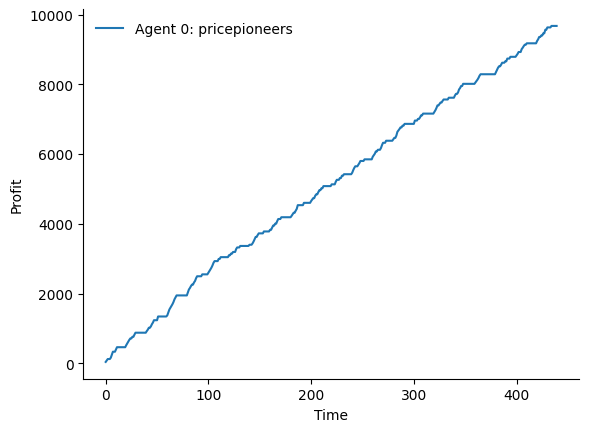

last customer covariate:  [2.66675971 4.98944654 5.77373274]
last (agent bought from, prices):  (nan, [np.float64(564.000284608263)])
current_profit per agent:  [np.float64(9674.90894493707)]
last customer covariate:  [1.21477145 1.96914045 6.61736324]
last (agent bought from, prices):  (0, [np.float64(46.82716820494748)])
current_profit per agent:  [np.float64(9721.736113142017)]
last customer covariate:  [4.9598117  4.39233965 9.55775497]
last (agent bought from, prices):  (0, [np.float64(42.82716820494748)])
current_profit per agent:  [np.float64(9764.563281346964)]
last customer covariate:  [2.45673405 0.42686292 5.41524403]
last (agent bought from, prices):  (0, [np.float64(82.82716820494748)])
current_profit per agent:  [np.float64(9847.390449551911)]
last customer covariate:  [ 5.59218415  4.07920385 14.99186867]
last (agent bought from, prices):  (0, [np.float64(46.82716820494748)])
current_profit per agent:  [np.float64(9894.217617756858)]
last customer covariate:  [1.30393354

In [ ]:
env.reset()
customer_covariates, sale, profits, inventories, time_until_replenish = env.get_current_state_customer_to_send_agents()
last_customer_covariates = customer_covariates

fig, ax = plt.subplots(figsize=(20, 10))
for t in range(0, T):
    actions = [agent.action((customer_covariates, sale, profits, inventories, time_until_replenish)) for agent in agents]
    customer_covariates, sale, profits, inventories, time_until_replenish = env.step(actions)
    newplot = env.render(True)
    if newplot:
        display.clear_output(wait=True)
        display.display(plt.gcf())
    if verbose:
        print('last customer covariate: ', last_customer_covariates)
        print('last (agent bought from, prices): ', sale)
        print('current_profit per agent: ', profits)
    last_customer_covariates = customer_covariates

plt.close()
print("Cumulative profit: {}".format(env.agent_profits))
print("Cumulative buyer utility: {}".format(env.cumulative_buyer_utility))

### Part 2

In [ ]:
# In part 2, each team's agent will be evaluated against all other teams.
project_part = 2
agentnames = ['pricepioneers', 'dummy_fixed_prices_adaptive']

In [ ]:
env, agents = make_env.make_env_agents(
    agentnames = agentnames, 
    project_part = project_part, 
    first_file = 'data/datafile1_2024.csv', 
    second_file='data/datafile2_2024.csv'
    )

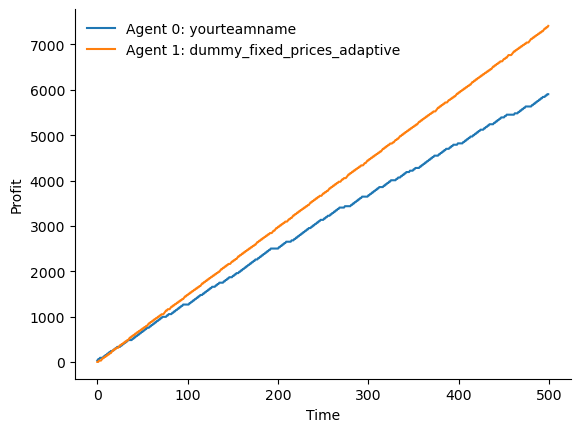

last customer covariate:  [1.374023   1.98173044 8.98031198]
last (item bought, agent bought from, prices):  (1, [30.123, 29.478852469148098])
current_profit per agent:  [5904.107999999981, 7409.5829943850595]
Cumulative profit: [5904.107999999981, 7409.5829943850595]
Cumulative buyer utility: [15938.5940823]


In [ ]:
# Note that under competition, the dummy 'yourteamname' agant performs much worse than without competition

env.reset()
customer_covariates, sale, profits, inventories, time_until_replenish = env.get_current_state_customer_to_send_agents()
last_customer_covariates = customer_covariates

fig, ax = plt.subplots(figsize=(20, 10))
for t in range(0, T):
    actions = [agent.action((customer_covariates, sale, profits, inventories, time_until_replenish)) for agent in agents]
    customer_covariates, sale, profits, inventories, time_until_replenish = env.step(actions)
    newplot = env.render(True)
    if newplot:
        display.clear_output(wait=True)
        display.display(plt.gcf())
    if verbose:
        print('last customer covariate: ', last_customer_covariates)
        print('last (item bought, agent bought from, prices): ', sale)
        print('current_profit per agent: ', profits)
    last_customer_covariates = customer_covariates

plt.close()
print("Cumulative profit: {}".format(env.agent_profits))
print("Cumulative buyer utility: {}".format(env.cumulative_buyer_utility))